# Food-Delivery-System
## Project Goal:
The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.

In [63]:
#Improting Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Loading Dataset
df = pd.read_csv(r"C:\Users\bharg\OneDrive\Desktop\GitHub\ML-Projects-Realife\Datasets\food-delivery.csv")

In [40]:
#Checking Data Load Or Not
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In [41]:
df.shape

(500, 7)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


- Here we can see that no null values because the shape is (500,7) and 500 is not null count

In [43]:
# Checking Dublicate Values
df.duplicated().sum()

np.int64(0)

- No Dubcliate Values

In [44]:
#Getting Satatical Infomation
df.describe()

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


In [46]:
df['FavoriteCuisine'].unique()

array(['Mexican', 'Thai', 'Italian', 'Chinese', 'Indian'], dtype=object)

# Statical Info
- Here data is about 500 users.
- Higest Age of user is 59 years and the min age is 18 Y/O and also Avg age is 30.
- Users 179 AppUsageTimePerDay becase of user can not find something he/she want and also 10 AppUsageTimePerDay it might user come to check daily offers.

In [47]:
# chaecking missing values
df.isna().sum()

UserID                0
Age                   0
TotalOrders           0
AverageSpend          0
FavoriteCuisine       0
DeliveryRating        0
AppUsageTimePerDay    0
dtype: int64

1. Were there any missing values in your dataset?
    - No there are not missing values.

2. Why is it important to check for missing values before analyzing data?
    - It can bias our model and model can not predict properly.

3. If you found missing values, what would you do about them?
    - If i found missing values in it i will replace it with mean,mod,meadien if it is numeric and i will also use mod if it is categorical.

4. What could be some real-life reasons why data might be missing in a food delivery app?
    - User might cancel the order and not give rating or network error may be.

5. How does knowing your data has no missing values help your project?
    - It will be not take too much for data cleaning.


In [48]:
# Dropping not useful columns
df = df.drop(['UserID'],axis=1)

1. Which columns did you remove from the dataset, and why?
    - Just labels (e.g., UserID).
    - Text-based (e.g., FavoriteCuisine) — because clustering methods work best with numbers.
2. Which columns did you keep in your cleaned dataset?
    - ['Age', 'TotalOrders', 'AverageSpend', 'DeliveryRating','AppUsageTimePerDay'] we can clustter according the time and spent.
3. Why should unique IDs (like UserID) not be used for clustering?
    - Because it might effect our data also users are not same.
4. Why is it helpful to remove text columns (like FavoriteCuisine) in early clustering steps?
    - User are diffrent and may have same orders again and again.
5. How does this data-cleaning step help you get ready for clustering users?
    - It is easy to cluster data in group ohterwise data would be imbalanced.

# Standardize Data

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])

<Axes: >

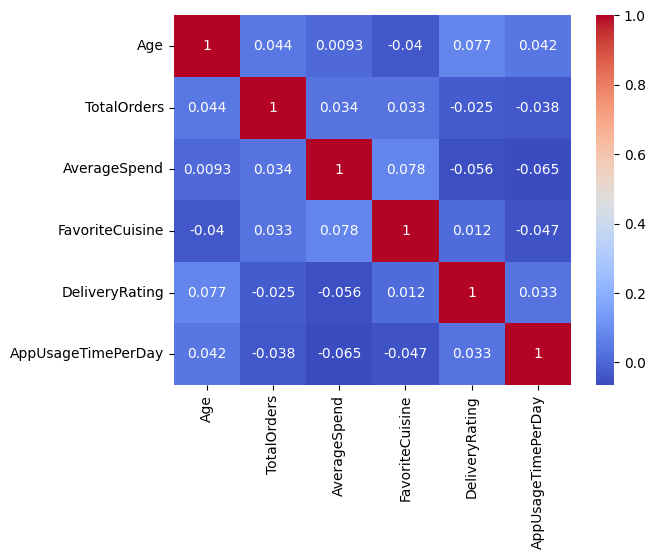

In [52]:
corr = df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [54]:
X = df
X

,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,3,4.6,20.9
1,46,34,193.97,3,3.0,150.2
2,32,22,291.66,3,4.1,59.7
3,25,30,232.21,4,3.7,85.5
4,38,27,244.84,2,4.7,13.7
...,...,...,...,...,...,...
495,56,30,398.62,4,4.3,150.7
496,49,27,423.00,0,3.6,39.0
497,41,31,355.66,4,3.6,15.2
498,40,29,305.66,4,4.1,44.8


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# PCA
We use PCA to reduce the dimensionality of the data and convert to two principle is Principal component 1 and Principal component 2. We use the first two principal components to represent the data.

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [60]:
from sklearn.cluster import KMeans , DBSCAN,AgglomerativeClustering
KMeans = KMeans(n_clusters=3)
KMeans_labels = KMeans.fit_predict(X_scaled)

In [61]:
centroid_pca = pca.transform(KMeans.cluster_centers_)

Here is a scatter plot for PCA between PC1 and PC2.we show a group of points that are close to each other, which means that they have similar characteristics. show a cluster in three group. 

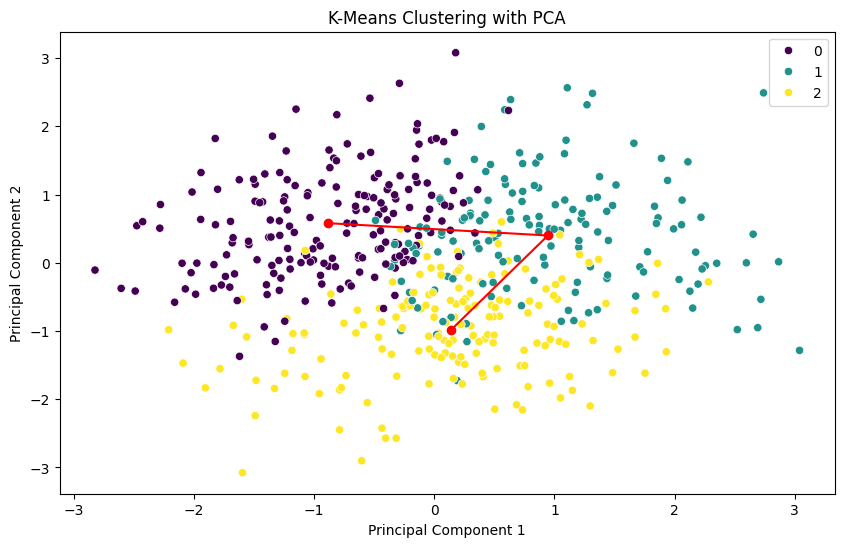

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=KMeans_labels, palette='viridis')
plt.plot(centroid_pca[:, 0], centroid_pca[:, 1],color = 'red',marker = 'o')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use a DBSCAN model and taking a result and make a scatter plot beetween PC1 and PC2.

In [68]:
db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)

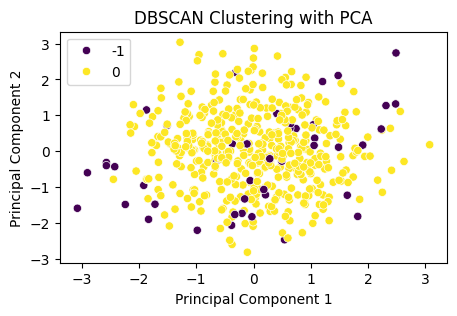

In [69]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 0], hue=db_labels, palette='viridis')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use a AgglomerativeClustering model and taking a result and make a scatter plot beetween PC1 and PC2.

In [70]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

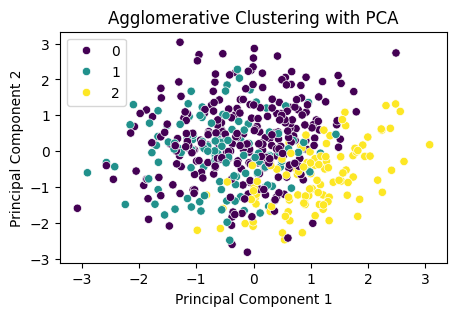

In [71]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 0], hue=agglo_labels, palette='viridis')
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use another model like :-
# Dendrogram , linkage , GaussianMixture , OPTICS

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage

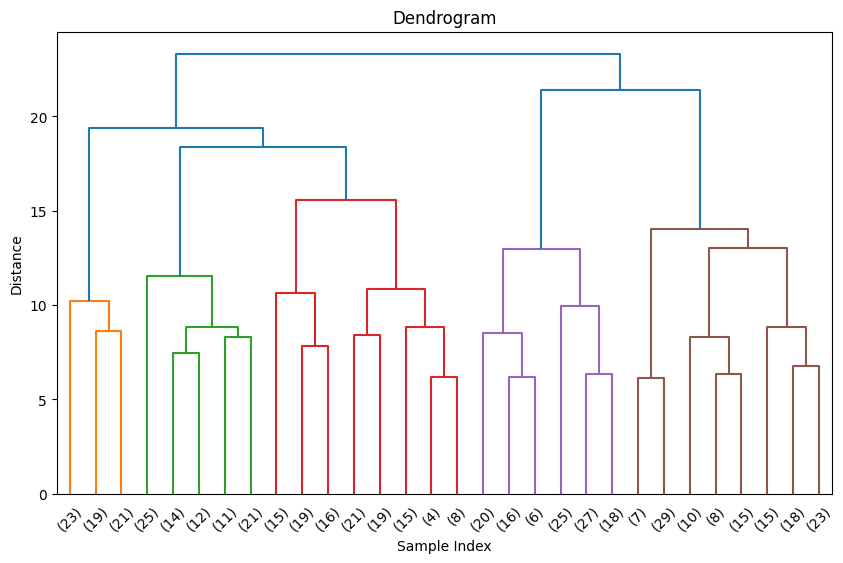

In [74]:
plt.figure(figsize=(10, 6))
link = linkage(X_scaled, method='ward')
dendrogram(link ,p = 30,truncate_mode='lastp')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [75]:
from sklearn.mixture import GaussianMixture

In [77]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmm_labels = gmm.predict(X)

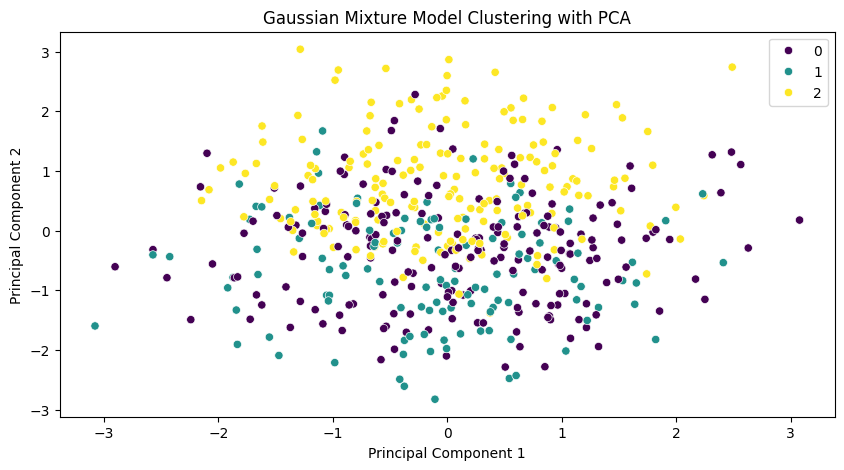

In [78]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 0], hue=gmm_labels, palette='viridis')
plt.title('Gaussian Mixture Model Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use a OPTICS model and taking a result and make a scatter plot beetween PC1 and PC2.

In [79]:
from sklearn.cluster import OPTICS

In [81]:
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clustering.fit(X)
optics_labels = clustering.labels_

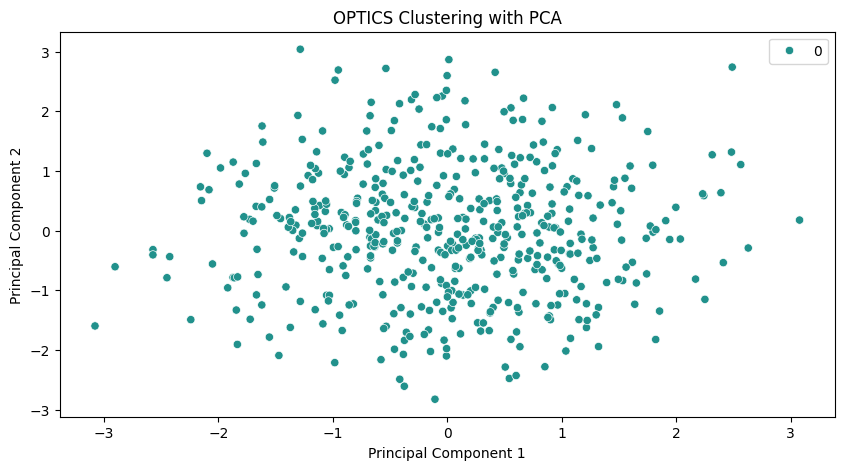

In [82]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 0], hue=optics_labels, palette='viridis', legend='full')
plt.title('OPTICS Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Conclution
Customer Choices: We found out which types of food are most liked by customers.

Delivery Process: We looked at how distance, traffic, and other things affect delivery time.

Busy Times: We found out which hours and days have the most food orders.